# Libraries

In [1]:
import torch
import sklearn
import numpy as np
import pandas as pd
from torch import nn
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
device = "cuda" if torch.cuda.is_available() is True else "cpu"
device

'cuda'

# Data

## Import Data

In [3]:
data = load_wine(as_frame=True) # Import as pandas dataframe

In [4]:
print(f"Feature names:{data.feature_names};\n\n Label names: {data.target_names}")

Feature names:['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'];

 Label names: ['class_0' 'class_1' 'class_2']


In [5]:
print(data.data.shape)

(178, 13)


## Exploratory Data Analysis

In [6]:
data.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
X = data.data
y = data.target

### Data Info
There are 178 examples in total with 13 features and 3 targets for each instance

In [8]:
data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [9]:
data.data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
X.shape, y.shape

((178, 13), (178,))

In [11]:
X[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

### Data Ranges
It is evident that the data ranges can be very large, and thus normalisation should be applied.

In [13]:
X.min(),X.max()

(alcohol                          11.03
 malic_acid                        0.74
 ash                               1.36
 alcalinity_of_ash                10.60
 magnesium                        70.00
 total_phenols                     0.98
 flavanoids                        0.34
 nonflavanoid_phenols              0.13
 proanthocyanins                   0.41
 color_intensity                   1.28
 hue                               0.48
 od280/od315_of_diluted_wines      1.27
 proline                         278.00
 dtype: float64,
 alcohol                           14.83
 malic_acid                         5.80
 ash                                3.23
 alcalinity_of_ash                 30.00
 magnesium                        162.00
 total_phenols                      3.88
 flavanoids                         5.08
 nonflavanoid_phenols               0.66
 proanthocyanins                    3.58
 color_intensity                   13.00
 hue                                1.71
 od280/od315

### Data Balance
Number of samples per class: 59, 71, 48, slightly unbalanced

In [14]:
num_class_0, num_class_1, num_class_2 = 0, 0, 0
for i in range(len(y)):
    if y[i] == 0:
        num_class_0 += 1
    elif y[i] == 1:
        num_class_1 += 1
    elif y[i] == 2:
        num_class_2 += 1
print(f"Number of examples for class_0: {num_class_0} \nNumber of examples for class_1: {num_class_1} \nNumber of examples for class_2: {num_class_2} \n")

Number of examples for class_0: 59 
Number of examples for class_1: 71 
Number of examples for class_2: 48 



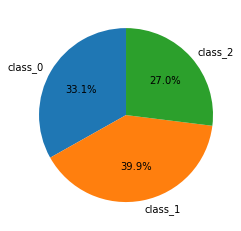

In [15]:
class_list = [num_class_0, num_class_1, num_class_2]
labels = 'class_0', 'class_1', 'class_2'
plt.pie(class_list,labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

## Data Preprocessing

### Data Splitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42)

### Normailisation

In [17]:
X_train = preprocessing.robust_scale(X_train)
X_train

array([[ 0.98884758, -0.12828947,  1.03030303, ..., -1.17037037,
        -0.61163227,  0.        ],
       [-0.35687732,  2.39144737,  0.84848485, ..., -0.42962963,
        -0.81425891, -0.33701336],
       [-0.47583643, -0.52960526, -0.78787879, ...,  0.22222222,
        -0.00375235,  0.        ],
       ...,
       [ 1.01858736, -0.00328947,  0.06060606, ...,  0.6962963 ,
         0.16885553,  2.0615921 ],
       [-0.23791822, -0.22697368, -0.3030303 , ..., -0.01481481,
        -0.53658537, -0.38349797],
       [-0.49814126,  0.37828947,  0.3030303 , ..., -0.48888889,
         0.45403377, -0.51597908]])

In [18]:
X_train.min(), X_train.max()

(-3.030303030303029, 3.4133333333333336)

In [19]:
# X_test = X_test.to_numpy()

### Label Encoding

In [20]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train.to_numpy().reshape(-1, 1)).toarray()
print(y_train[:5])

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [21]:
y_test = ohe.fit_transform(y_test.to_numpy().reshape(-1, 1)).toarray()

In [22]:
y_test[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

# Model

## Model Architecture

In [23]:
class dnn(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, out_dim):
        super().__init__()
        
        self.layers = nn.Sequential(
        nn.Linear(input_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, out_dim),
        nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        return self.layers(x)

## Hyperparameters

In [24]:
input_dim = len(X_train[0])
hidden_dim = 5
out_dim = 3
learning_rate = 0.05
epochs = 1200

In [25]:
model = dnn(input_dim, hidden_dim, out_dim)
model

dnn(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=3, bias=True)
    (3): Softmax(dim=1)
  )
)

## Parameters

In [26]:
model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[-0.0785, -0.2279,  0.1603, -0.1769, -0.2646, -0.0053,  0.2265, -0.0113,
                        0.1522,  0.1148,  0.0663,  0.0088, -0.0454],
                      [-0.0790,  0.0905,  0.2006,  0.2363,  0.0595,  0.0928,  0.0843, -0.1494,
                        0.1463, -0.0778, -0.2262, -0.1810, -0.2111],
                      [ 0.0626,  0.2565,  0.2135,  0.1150,  0.1947,  0.2769,  0.2064,  0.2165,
                        0.0344, -0.2247,  0.2428, -0.1350, -0.1048],
                      [-0.2476, -0.0736,  0.2242, -0.1527,  0.1252,  0.1166, -0.2566, -0.1710,
                        0.2733, -0.1993, -0.0536, -0.2170,  0.1291],
                      [-0.0594,  0.2185,  0.1233,  0.2067, -0.2613, -0.1862,  0.0509,  0.0762,
                       -0.2285,  0.1139,  0.1738, -0.1332, -0.2677]])),
             ('layers.0.bias',
              tensor([-0.0468,  0.0618, -0.1273,  0.2249,  0.0600])),
             ('layers.2.weight',
          

## Loss function and optimizer

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Trainer

## Normalize the test set

In [28]:
X_test = preprocessing.robust_scale(X_test)

## Turn data into Tensor dtype

In [29]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [30]:
epoch_list = []
training_loss_list = []
test_loss_list = []
test_acc_list = []

In [31]:
y_train.squeeze()[:5]

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])

In [32]:
# # Transform softmax output to one hot vector
# def preds_encoding(predictions):
#     out = []

#     for i in range(len(predictions)):
#         out.append(torch.argmax(predictions[i]).item())

#     out = ohe.fit_transform(np.array(out).reshape(-1, 1)).toarray()
    
#     return out

## Training

In [33]:
for epoch in range(epochs+1):
    
    # Set model as train mode
    model.train()
    
    # Foward propagation
    preds_train = model(X_train)
    
    # Compute loss
    training_loss = criterion(preds_train.squeeze(), y_train.squeeze())
    
    # Clear grads
    optimizer.zero_grad()
    
    # Compute grads
    training_loss.backward()
    
    # Update parameters
    optimizer.step()
    
    # Evaluate test loss and test accuracy
    model.eval()
    with torch.inference_mode():
        preds_test = model(X_test)
        test_loss = criterion(preds_test.squeeze(), y_test.squeeze())
        preds_test_ = torch.argmax(preds_test, dim=1)
        y_test_ = torch.argmax(y_test, dim=1)
        acc = accuracy_score(y_test_, preds_test_)
    # Save logs
    epoch_list.append(epoch)
    training_loss_list.append(training_loss.item())
    test_loss_list.append(test_loss.item())
    test_acc_list.append(acc)
    # Print logs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}; Training loss: {training_loss.item()}; Test loss: {test_loss.item()}; Test Accuracy: {acc}")

Epoch: 0; Training loss: 1.0992521047592163; Test loss: 1.10009765625; Test Accuracy: 0.3333333333333333
Epoch: 10; Training loss: 1.0873967409133911; Test loss: 1.0870031118392944; Test Accuracy: 0.4444444444444444
Epoch: 20; Training loss: 1.075305700302124; Test loss: 1.0732176303863525; Test Accuracy: 0.5277777777777778
Epoch: 30; Training loss: 1.0630707740783691; Test loss: 1.059016466140747; Test Accuracy: 0.5555555555555556
Epoch: 40; Training loss: 1.0504271984100342; Test loss: 1.0443164110183716; Test Accuracy: 0.5555555555555556
Epoch: 50; Training loss: 1.037772297859192; Test loss: 1.0295662879943848; Test Accuracy: 0.5555555555555556
Epoch: 60; Training loss: 1.0249842405319214; Test loss: 1.0150809288024902; Test Accuracy: 0.5555555555555556
Epoch: 70; Training loss: 1.0125492811203003; Test loss: 1.0010238885879517; Test Accuracy: 0.5833333333333334
Epoch: 80; Training loss: 1.0006484985351562; Test loss: 0.9875518083572388; Test Accuracy: 0.5833333333333334
Epoch: 90;

## Prediction

In [42]:
preds_test_

tensor([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2,
        2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

# Metrics

## Loss and Accuracy Curves

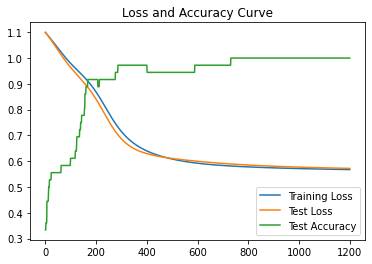

In [43]:
# Plot the loss curves
# plt.figure(figsize=(6,12))
plt.plot(epoch_list, training_loss_list, label="Training Loss")
plt.plot(epoch_list, test_loss_list, label="Test Loss")
plt.plot(epoch_list, test_acc_list, label="Test Accuracy")

plt.title("Loss and Accuracy Curve")
plt.legend()

In [37]:
# preds_train_oh = preds_encoding(preds_train)
# preds_test_oh = preds_encoding(preds_test)
# preds_train_oh = torch.tensor(preds_train_oh, dtype=torch.int64) # numpy arrays to tensors
# preds_test_oh = torch.tensor(preds_test_oh, dtype=torch.int64) # numpy arrays to tensors
# y_train = y_train.type(torch.int64) # turn into integers
# y_test = y_test.type(torch.int64) # turn into integers

In [38]:
# preds_train_oh[:5], preds_test_oh[:5]

In [39]:
# Training accuracy
# accuracy_fn(preds_train_oh, y_train)

In [40]:
# Test accuracy
# accuracy_fn(preds_test_oh, y_test)

In [41]:
# accuracy_score(y_test, preds_test_oh)